# Paltas movie

Paltas software: https://github.com/swagnercarena/paltas

COSMOS Catalogue: https://github.com/GalSim-developers/GalSim/wiki/RealGalaxy%20Data

^This catalogue must be downloaded and unzipped.


In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib widget
#%matplotlib inline
%matplotlib notebook

from lightcone.plot_3d import Plot3d
from lightcone.animate import Animate
from lenstronomy.Util import util


In [2]:
import paltas

from paltas.Configs.config_handler import ConfigHandler
import lightcone
root_path, _ = os.path.split(os.path.dirname(lightcone.__file__))
print(root_path)

# We'll pass one of our example Configs in
config_handler = ConfigHandler(os.path.join(root_path,'Data/Paltas/test_config.py'))

# First let's get the lenstronomy kwargs_model and kwargs_param
kwargs_model, kwargs_param = config_handler.get_lenstronomy_models_kwargs()

# We can see what keys are returned, and inspect the lens models in particular
print('Available Keys:')
print(kwargs_model.keys())
print('')

#kwargs_model['multi_plane'] = True
#kwargs_model['z_source'] = kwargs_model['source_redshift_list'][0]
#kwargs_model['source_light_model_list'] = source_light_model_list
kwargs_source = kwargs_param['kwargs_source']

print('lens_model_list')
print(kwargs_model['source_light_model_list'])

kwargs_lens = kwargs_param['kwargs_lens']

# Getting data of our current parameters we are working with. Catalog index and random rotation angle printed out
sample = config_handler.get_current_sample()
print('\nCatalog index\n' + str(sample['source_parameters']['catalog_i']))
print('\nRotation Angle\n' + str(sample['source_parameters']['phi']))


c:\users\zombi\lightcone
Available Keys:
dict_keys(['lens_model_list', 'lens_redshift_list', 'lens_light_model_list', 'point_source_model_list', 'source_light_model_list', 'source_redshift_list', 'multi_plane', 'z_source', 'z_source_convention'])

lens_model_list
['INTERPOL']

Catalog index
47811

Rotation Angle
2.2855405110525226


In [3]:
from lenstronomy.LightModel.light_model import LightModel

# Add a lens galaxy light model
lens_light_model_list = ['HERNQUIST']
lightModel_lens = LightModel(light_model_list=lens_light_model_list)
kwargs_light_lens = [{'amp': 1000, 'Rs': 0.1, 'center_x': kwargs_source[0]['center_x'], 'center_y': kwargs_source[0]['center_y']}]
kwargs_model['lens_light_model_list'] = lens_light_model_list


In [4]:
n_z_bins = 400

num_pix = 400
delta_pix = 0.01



# TODO coordinate grid from paltas
ra_grid, dec_grid, ra_at_xy_0, dec_at_xy_0, x_at_radec_0, y_at_radec_0, Mpix2coord, Mcoord2pix = util.make_grid_with_coordtransform(num_pix, delta_pix, center_ra=0, center_dec=0, left_lower=False,
                                   inverse=False)

kwargs_pixel_grid = {'nx': num_pix, 'ny': num_pix, 'ra_at_xy_0': ra_at_xy_0, 'dec_at_xy_0': dec_at_xy_0, 'transform_pix2angle': Mpix2coord}


plot3d = Plot3d(kwargs_model, kwargs_lens, kwargs_source, kwargs_pixel_grid, n_z_bins, kwargs_lens_light=kwargs_light_lens)


<IPython.core.display.Javascript object>


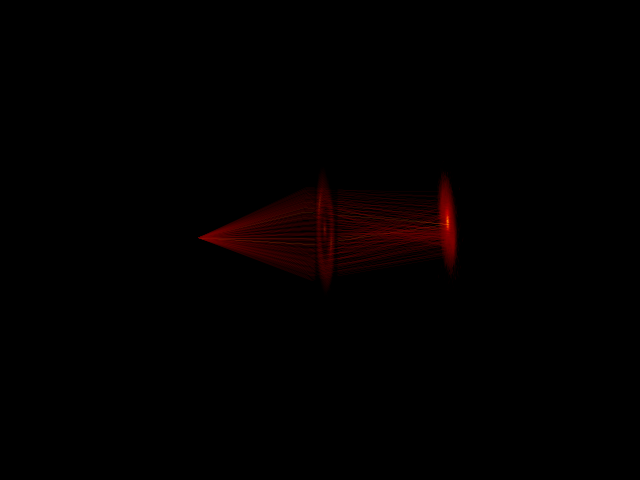

In [9]:
angle1 = 10
angle2 = -100

fig = plt.figure()

plot3d.plot3d(fig=fig, angle1=angle1, angle2=angle2, n_ray=0, plot_source=True, plot_lens=True, plot_rays=True, alpha_lens=0.05)
fig.tight_layout()
fig.show()


In [ ]:
folder_path = '/Users/sibirrer/Science/Projects/LensModelling/Educational/Movies/'
movie_name = 'test_COSMOS_Catalogue'

kwargs_plot3d = {'kwargs_model': kwargs_model, 'kwargs_lens': kwargs_lens, 
                 'kwargs_source': kwargs_source, 'kwargs_pixel_grid': kwargs_pixel_grid, 
                 'n_z_bins': n_z_bins}


animate = Animate(movie_name=movie_name, folder_path=folder_path, **kwargs_plot3d)


angle1 = 10 
angle2 = -100

animate.ray_shooting(angle1, angle2)
animate.rotate_to_front(angle1, angle2, n_rotate=n_z_bins)
animate.transition_to_noised_img(config_handler=config_handler, sample=sample)
animate.mp4(fps=20)
animate.gif(fps=30)
animate.finish()


In [ ]:
from IPython.display import Video

movie_file = animate.movie_name()
#folder_path + movie_name + ".mp4"

print(movie_file)

Video(movie_file, embed=True)
